In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [13]:
fp_california = "data/raw_california-history.csv"
df_california = pd.read_csv(fp_california)
df_california= df_california.sort_index(ascending=False)
df_california = df_california.reset_index(drop=True)
df_california

,date,state,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,...,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
0,2020-03-04,CA,NaN,NaN,0,NaN,NaN,NaN,NaN,0,...,515,0,NaN,NaN,NaN,NaN,NaN,0,515,515
1,2020-03-05,CA,NaN,NaN,0,NaN,NaN,NaN,NaN,0,...,515,0,NaN,NaN,NaN,NaN,NaN,0,515,0
2,2020-03-06,CA,NaN,NaN,0,NaN,NaN,NaN,NaN,0,...,522,7,NaN,NaN,NaN,NaN,NaN,0,522,7
3,2020-03-07,CA,NaN,NaN,0,NaN,NaN,NaN,NaN,0,...,531,9,NaN,NaN,NaN,NaN,NaN,0,531,9
4,2020-03-08,CA,NaN,NaN,0,NaN,NaN,NaN,NaN,0,...,550,19,NaN,NaN,NaN,NaN,NaN,0,550,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,2021-03-03,CA,52775.0,NaN,278,NaN,NaN,NaN,5110.0,0,...,49028048,130858,NaN,NaN,NaN,NaN,NaN,0,49028048,130858
365,2021-03-04,CA,53048.0,NaN,273,NaN,NaN,NaN,4967.0,0,...,49147685,119637,NaN,NaN,NaN,NaN,NaN,0,49147685,119637
366,2021-03-05,CA,53448.0,NaN,400,NaN,NaN,NaN,4714.0,0,...,49294503,146818,NaN,NaN,NaN,NaN,NaN,0,49294503,146818
367,2021-03-06,CA,53866.0,NaN,418,NaN,NaN,NaN,4513.0,0,...,49512828,218325,NaN,NaN,NaN,NaN,NaN,0,49512828,218325


In [7]:
df_california.columns

Index(['date', 'state', 'death', 'deathConfirmed', 'deathIncrease',
       'deathProbable', 'hospitalized', 'hospitalizedCumulative',
       'hospitalizedCurrently', 'hospitalizedIncrease', 'inIcuCumulative',
       'inIcuCurrently', 'negative', 'negativeIncrease',
       'negativeTestsAntibody', 'negativeTestsPeopleAntibody',
       'negativeTestsViral', 'onVentilatorCumulative', 'onVentilatorCurrently',
       'positive', 'positiveCasesViral', 'positiveIncrease', 'positiveScore',
       'positiveTestsAntibody', 'positiveTestsAntigen',
       'positiveTestsPeopleAntibody', 'positiveTestsPeopleAntigen',
       'positiveTestsViral', 'recovered', 'totalTestEncountersViral',
       'totalTestEncountersViralIncrease', 'totalTestResults',
       'totalTestResultsIncrease', 'totalTestsAntibody', 'totalTestsAntigen',
       'totalTestsPeopleAntibody', 'totalTestsPeopleAntigen',
       'totalTestsPeopleViral', 'totalTestsPeopleViralIncrease',
       'totalTestsViral', 'totalTestsViralIncrease'

In [14]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df_california)

,date,state,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,inIcuCumulative,inIcuCurrently,negative,negativeIncrease,negativeTestsAntibody,negativeTestsPeopleAntibody,negativeTestsViral,onVentilatorCumulative,onVentilatorCurrently,positive,positiveCasesViral,positiveIncrease,positiveScore,positiveTestsAntibody,positiveTestsAntigen,positiveTestsPeopleAntibody,positiveTestsPeopleAntigen,positiveTestsViral,recovered,totalTestEncountersViral,totalTestEncountersViralIncrease,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
0,2020-03-04,CA,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,462.0,0,NaN,NaN,NaN,NaN,NaN,53,53,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,515,0,NaN,NaN,NaN,NaN,NaN,0,515,515
1,2020-03-05,CA,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,462.0,0,NaN,NaN,NaN,NaN,NaN,53,53,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,515,0,NaN,NaN,NaN,NaN,NaN,0,515,0
2,2020-03-06,CA,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,462.0,0,NaN,NaN,NaN,NaN,NaN,60,60,7,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,522,7,NaN,NaN,NaN,NaN,NaN,0,522,7
3,2020-03-07,CA,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,462.0,0,NaN,NaN,NaN,NaN,NaN,69,69,9,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,531,9,NaN,NaN,NaN,NaN,NaN,0,531,9
4,2020-03-08,CA,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,462.0,0,NaN,NaN,NaN,NaN,NaN,88,88,19,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,550,19,NaN,NaN,NaN,NaN,NaN,0,550,19
5,2020-03-09,CA,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,690.0,228,NaN,NaN,NaN,NaN,NaN,114,114,26,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,804,254,NaN,NaN,NaN,NaN,NaN,0,804,254
6,2020-03-10,CA,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,690.0,0,NaN,NaN,NaN,NaN,NaN,133,133,19,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,823,19,NaN,NaN,NaN,NaN,NaN,0,823,19
7,2020-03-11,CA,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,916.0,226,NaN,NaN,NaN,NaN,NaN,157,157,24,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1073,250,NaN,NaN,NaN,NaN,NaN,0,1073,250
8,2020-03-12,CA,4.0,NaN,4,NaN,NaN,NaN,NaN,0,NaN,NaN,916.0,0,NaN,NaN,NaN,NaN,NaN,202,202,45,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1118,45,NaN,NaN,NaN,NaN,NaN,0,1118,45
9,2020-03-13,CA,4.0,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,916.0,0,NaN,NaN,NaN,NaN,NaN,202,202,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1118,0,NaN,NaN,NaN,NaN,NaN,0,1118,0


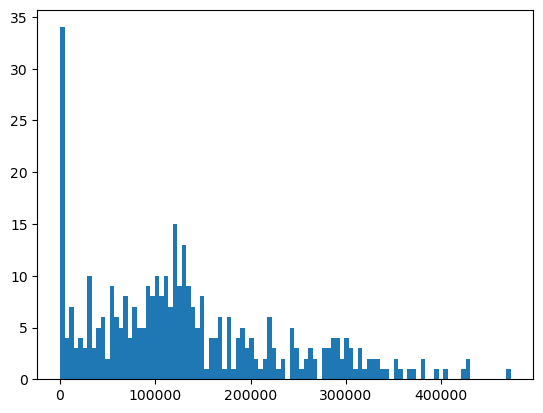

In [ ]:
y = df_california["totalTestResultsIncrease"]

plt.hist(y, bins=100)
plt.show()

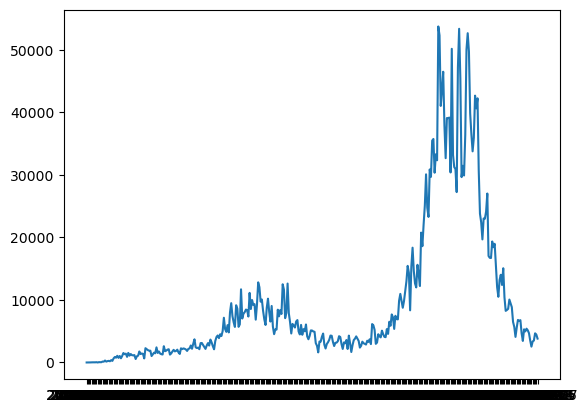

In [16]:
y = df_california["positiveIncrease"]
x = df_california["date"]
plt.plot(x, y)
plt.show()


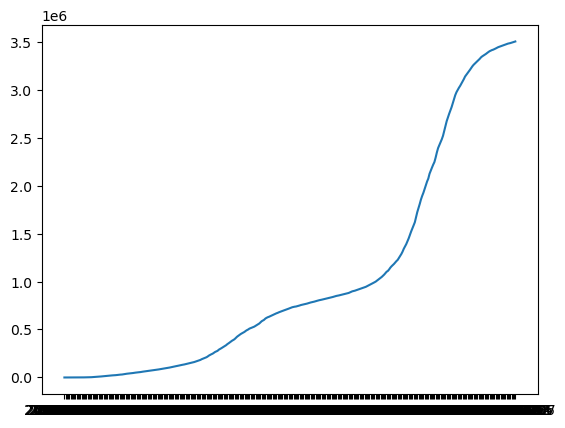

In [15]:
y = df_california["positiveIncrease"].cumsum()
x = df_california["date"]
plt.plot(x, y)
plt.show()

In [19]:
# Cumulative Increases, ncrease in net positive cases
df_california["positiveIncreaseCumulative"] = df_california["positiveIncrease"].cumsum()
df_california["netIncrease"] = df_california["positiveIncrease"] - df_california["deathIncrease"]
df_california["infectious"] = df_california["netIncrease"].rolling(window=7).sum()
df_california["recoveredIncrease"] = df_california["netIncrease"].shift(periods=10, fill_value=0)
df_california["recoveredCumulative"] = df_california["recoveredIncrease"].cumsum()

In [21]:
df_california

,date,state,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,...,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease,positiveIncreaseCumulative,netIncrease,infectious,recoveredIncrease,recoveredCumulative
0,2020-03-04,CA,NaN,NaN,0,NaN,NaN,NaN,NaN,0,...,NaN,NaN,0,515,515,0,0,NaN,0,0
1,2020-03-05,CA,NaN,NaN,0,NaN,NaN,NaN,NaN,0,...,NaN,NaN,0,515,0,0,0,NaN,0,0
2,2020-03-06,CA,NaN,NaN,0,NaN,NaN,NaN,NaN,0,...,NaN,NaN,0,522,7,7,7,NaN,0,0
3,2020-03-07,CA,NaN,NaN,0,NaN,NaN,NaN,NaN,0,...,NaN,NaN,0,531,9,16,9,NaN,0,0
4,2020-03-08,CA,NaN,NaN,0,NaN,NaN,NaN,NaN,0,...,NaN,NaN,0,550,19,35,19,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,2021-03-03,CA,52775.0,NaN,278,NaN,NaN,NaN,5110.0,0,...,NaN,NaN,0,49028048,130858,3484910,3074,26704.0,6480,3392788
365,2021-03-04,CA,53048.0,NaN,273,NaN,NaN,NaN,4967.0,0,...,NaN,NaN,0,49147685,119637,3488414,3231,26084.0,4432,3397220
366,2021-03-05,CA,53448.0,NaN,400,NaN,NaN,NaN,4714.0,0,...,NaN,NaN,0,49294503,146818,3493073,4259,25334.0,3222,3400442
367,2021-03-06,CA,53866.0,NaN,418,NaN,NaN,NaN,4513.0,0,...,NaN,NaN,0,49512828,218325,3497525,4034,24656.0,4989,3405431


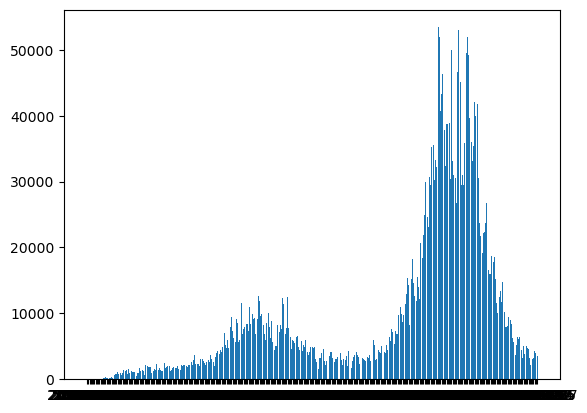

In [23]:
y = df_california["netIncrease"]
x = df_california["date"]
plt.bar(x, y)
plt.show()

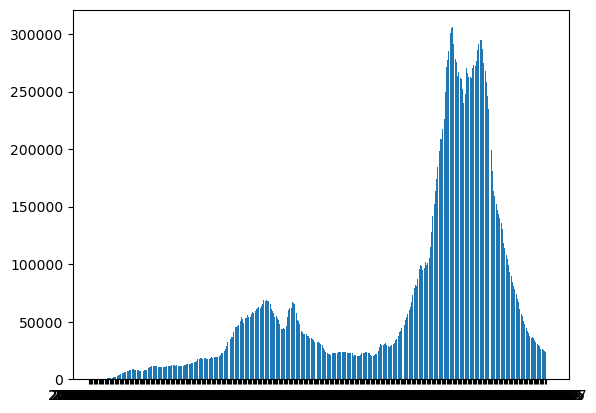

In [24]:
y = df_california["infectious"] 
x = df_california["date"]
plt.bar(x, y)
plt.show()

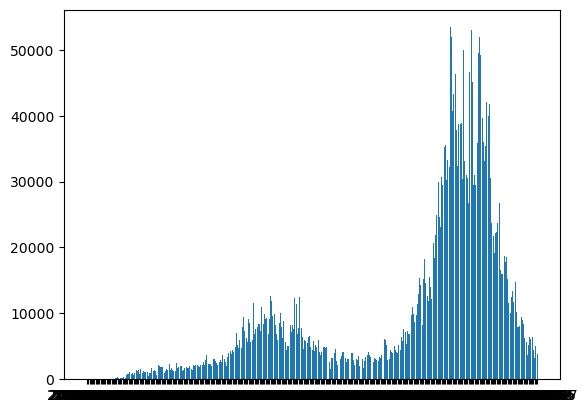

In [25]:
y = df_california["recoveredIncrease"]
x = df_california["date"]
plt.bar(x, y)
plt.show()

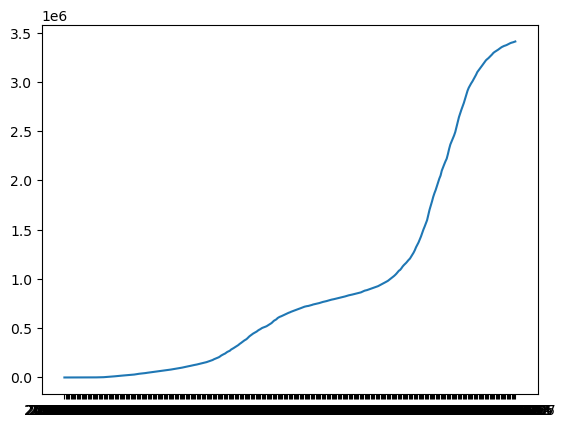

In [26]:
y = df_california["recoveredCumulative"]
x = df_california["date"]
plt.plot(x, y)
plt.show()